In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

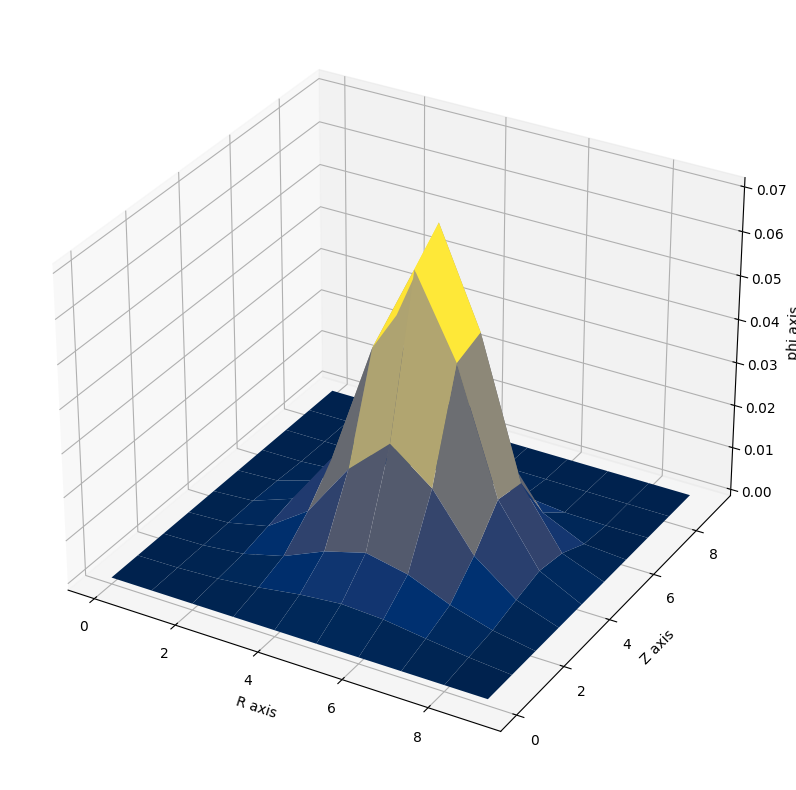

In [8]:
#syarat awal
jumlah_r = 10
jumlah_z = 10
delta_r = 0.5
delta_z = 0.5
jumlah_iterasi = 1000
epsilon_nol = 1
temp = np.zeros((jumlah_z,jumlah_r))
phi = np.zeros((jumlah_z,jumlah_r))
data_rho = np.zeros((jumlah_z,jumlah_r))

#distribusi gauss 2 dimensi
r_0 = 5 # nilai titik
z_0 = 5 # pusat

var_r = 1 # nilai varian
var_z = 1

for m in range(jumlah_z):
    for n in range(jumlah_r):
        gauss_2d = np.exp(-(((n-r_0)**2/(2*var_r))+((m-z_0)**2)/(2*var_z)))
        data_rho[m,n] = (gauss_2d)
        
np.savetxt('rho_dua_dimensi_silinder.csv', data_rho, fmt = '%.11f', delimiter=',') #penyimpanan rho

# perhitungan phi
for k in range (jumlah_iterasi):
    for j in range (1, jumlah_z-1):
        for i in range (1, jumlah_r-1):
            phi[j,i] = (-data_rho[j,i]/epsilon_nol - ((temp[j, i+1]+temp[j, i-1])/delta_r**2) - (temp[j, i+1]/i*delta_r) - ((temp[j+1, i]-temp[j-1, i])/delta_z**2))*((((delta_r**2)*(delta_z**2)*i) - ((delta_r**3)*(delta_z**2)))/(-2*i*(delta_z**2) + 2*delta_r*(delta_z**2) - (delta_r**2)*(delta_z**2) - 2*(delta_r**2)*i - (delta_r**2)*delta_r))
            temp[j,i] = phi[j,i]

np.savetxt('phi_dua_dimensi_silinder.csv', phi, fmt = '%.15f', delimiter=',') #penyimpanan hasil phi

#plotting 
df = pd.read_csv('phi_dua_dimensi_silinder.csv', header = None)

r = df.columns
z = df.index

R,Z = np.meshgrid(r,z)
P = df.values

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('R axis')
ax.set_ylabel('Z axis')
ax.set_zlabel('phi axis')

surf = ax.plot_surface(R, Z, P, cmap = plt.cm.cividis, linewidth=0)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.0,1.341757e-02,6.884361e-03,1.829661e-03,3.991960e-04,8.245678e-05,1.631397e-05,3.058582e-06,5.239465e-07,0.0
2,0.0,9.170203e-04,-3.136370e-04,-3.852725e-04,-1.691791e-04,-5.458927e-05,-1.513471e-05,-3.789480e-06,-8.405420e-07,0.0
3,0.0,1.268161e-04,1.773252e-04,1.328853e-04,6.810767e-05,2.743663e-05,9.416705e-06,2.870684e-06,7.551320e-07,0.0
4,0.0,-1.583641e-05,-4.132316e-05,-3.983481e-05,-2.480557e-05,-1.194310e-05,-4.838833e-06,-1.719189e-06,-5.145003e-07,0.0
5,0.0,3.664471e-06,1.063318e-05,1.189230e-05,8.605595e-06,4.784746e-06,2.219852e-06,8.935894e-07,2.962699e-07,0.0
6,0.0,-8.802860e-07,-2.811201e-06,-3.548702e-06,-2.907273e-06,-1.824332e-06,-9.500603e-07,-4.256619e-07,-1.538803e-07,0.0
7,0.0,2.226181e-07,7.589044e-07,1.052967e-06,9.529102e-07,6.590402e-07,3.761803e-07,1.830290e-07,7.050516e-08,0.0
8,0.0,-6.442113e-08,-2.315915e-07,-3.512756e-07,-3.517795e-07,-2.703726e-07,-1.715276e-07,-9.221344e-08,-3.843747e-08,0.0
9,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
